In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Read Data
dataset taken from: https://www.kaggle.com/c/fake-news

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
print('Train Shape {}, Test Shape{}'.format(train.shape, test.shape))
train.head()

Train Shape (20800, 5), Test Shape(5200, 4)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


###  Target Value Exploration

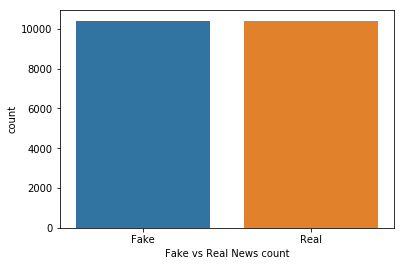

In [4]:
train['label_name'] = train['label'].map({0:'Real', 1:'Fake'})
sns.countplot(train.label_name)
plt.xlabel('Fake vs Real News count')
plt.show()

train.drop('label_name', axis=1, inplace=True)

### Authors

In [5]:
print('Number of Distinct Authors:',train['author'].value_counts().shape[0])

Number of Distinct Authors: 4201


### Sample News Text
Display a Random News text

In [6]:
import random
rand_index = random.randint(0, 20000)
if train.label[rand_index] == 0:
   print('Real News')
else:
  print('Fake News')

print('Author:', train.author[rand_index])
train.text[rand_index]


Real News
Author: Steven Kurutz


'WASHINGTON, Conn.  —   In 1999, a television writer named Amy   vacationed at the Mayflower Grace, a   inn built high on a hill here. In true Hollywood fashion, Ms.   returned to her hometown, Los Angeles, and from her brief visit spun Stars Hollow  —   a charming New England small town with its own resident troubadour. Stars Hollow would become the setting for “Gilmore Girls,” her cultishly popular   dramedy that ran for seven seasons on the WB (and later the CW). Last weekend, more than 1, 300 fans, most of them women, many of them mothers and daughters, descended on this rural town in western Connecticut (population: 3, 500) for the first Gilmore Girls Fan Fest. They had come from Oklahoma and Minnesota and as far away as Brazil  —   and paid as much as $250 per ticket  —   to see the “real” Stars Hollow and meet some of the actors who play its residents. In a way, they wanted to do the impossible: to experience in waking life a dream town built on a studio backlot. In Stars Hollow

## Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent= (data.isnull().sum() * 100 / data.isnull().count() ).sort_values(ascending = False)
    df = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    return df[df['Total'] != 0]

In [8]:
missing_data(train)

,Total,Percent
author,1957,9.408654
title,558,2.682692
text,39,0.187500


### Data Pre-Processing

In [9]:
train = train.fillna('')
test =  test.fillna('')

In [10]:
train['total']=train['title']+' '+train['author']+' '+train['text']
test['total']= test['title']+' '+test['author']+' '+test['text']

In [11]:
train_texts = train.total.tolist()
test_texts = test.total.tolist()
train_labels = train['label'].values
train_texts[:3]

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members 

In [12]:
train_labels[:3]

array([1, 0, 1], dtype=int64)

### Tokenize Raw Data

In [13]:
from keras.preprocessing.text import Tokenizer

max_words = 20000 # Top number of words in sample

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_texts)

# Create a numneric array for text array
sequences = tokenizer.texts_to_sequences(train_texts)

#Mapping of all words to number 
word_index = tokenizer.word_index
print('Found %s unique token' % len(word_index))

train_data = np.array(sequences)
print('Train Data Shape', train_data.shape)

print('Display first three texts converted to numbers')
train_data[:3]

C:\Users\I056036\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 242482 unique token
Train Data Shape (20800,)
Display first three texts converted to numbers


array([list([129, 5167, 2271, 42, 371, 85, 151, 2682, 792, 332, 2526, 7401, 2972, 14, 11929, 129, 5167, 2271, 42, 371, 85, 151, 2682, 792, 332, 2526, 7401, 2972, 14, 18, 11929, 10, 370, 519, 142, 3497, 2526, 7401, 10, 1, 12029, 6, 95, 15500, 4190, 1109, 4744, 620, 986, 175, 5, 2726, 6210, 18, 2752, 12, 11822, 2, 5860, 60, 8, 65, 1490, 33, 1, 1537, 427, 6, 1, 108, 8, 26, 311, 694, 607, 30, 164, 2, 5, 129, 275, 2271, 14, 1359, 63, 42, 66, 133, 33, 1, 393, 1537, 427, 8, 15, 159, 14, 2086, 57, 7, 56, 607, 635, 23, 80, 5693, 792, 4152, 7, 1, 291, 13, 648, 73, 376, 7, 119, 22, 952, 2, 110, 394, 265, 1419, 1, 4973, 345, 10, 1, 3267, 5371, 371, 1171, 40, 14, 24, 607, 31, 212, 57, 1118, 5, 2247, 24, 43, 3, 1, 202, 502, 13587, 15, 42, 80, 133, 607, 7480, 1, 202, 13587, 4, 275, 4973, 281, 3, 1, 129, 449, 4112, 4, 4284, 5371, 7, 23, 599, 13, 5757, 376, 14, 37, 518, 1471, 6, 269, 2, 151, 55, 31, 3384, 1641, 263, 25, 184, 64, 26, 792, 384, 57, 4284, 502, 877, 2526, 7401, 344, 1, 148, 108, 12, 26, 22

In [14]:
word_index

{'leichtsinnigerweise': 150217,
 '“recall': 141401,
 '“brooms': 185713,
 'efsa': 66878,
 'sprites': 217406,
 'τάγμα': 179651,
 'vengeance—for': 240296,
 'léonel': 95436,
 'spielbergian': 128375,
 'надеждинская': 215609,
 'muscles': 8551,
 'delantero': 85451,
 'moropoulou': 57953,
 '“marco’s': 223213,
 '“absolutely”': 33750,
 'recibió': 39298,
 'innehalde': 161387,
 'collonaded': 224015,
 'geneticists’': 198987,
 '47': 4287,
 'ausgebildet': 176121,
 'dynamited': 112820,
 'interpersonal': 38085,
 'sdsm': 237697,
 'burgum': 75286,
 'scriptural': 63069,
 'cruz”': 117381,
 'anschutz’s': 154348,
 'bigly': 45064,
 'organisation': 8847,
 'dispite': 239580,
 'unsc': 25398,
 'metzel': 91985,
 '“outfront': 167998,
 '“blackballed”': 96415,
 'lusting': 187894,
 'kiloscrapes': 177503,
 'осуществляются': 96710,
 'birol': 86794,
 'hoarder’s': 198037,
 'collector': 13642,
 'foremost': 8254,
 'grazia': 54448,
 'cranford': 102775,
 'police’': 48124,
 'antipesticide': 227184,
 'aftermath': 4117,
 'cases':

### Tokenize Test Data

In [15]:
sequences = tokenizer.texts_to_sequences(test_texts)
test_data = np.array(sequences)
print('Test Data Shape', test_data.shape)

Test Data Shape (5200,)


### One Hot Encode

In [16]:
def vectorize_sequences(sequences, dimensions = max_words):
#   One hot encode
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):      
        results[i, sequences] = 1
    return results    



In [17]:
X  = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print('Train Shape {}, Test Shape{}'.format(X.shape, X_test.shape))
pd.DataFrame(X).head()

Train Shape (20800, 20000), Test Shape(5200, 20000)


,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Convert labels to Float array

In [18]:
y = np.asarray(train_labels).astype('float32')
y[:5]

array([1., 0., 1., 1., 1.], dtype=float32)

### Create Training and Validation sets

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20,  random_state = 42, stratify = y)
print('Train Size{}, Validation Size {}, Test Size {}'.format(X_train.shape, X_valid.shape, X_test.shape))

Train Size(16640, 20000), Validation Size (4160, 20000), Test Size (5200, 20000)


### Create NN Models

In [20]:
from keras import models, layers
from keras import losses, metrics, optimizers, regularizers

#Create Dense Model
def get_dnn_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation= 'relu', input_shape = (max_words, )))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(1, activation= 'sigmoid'))
    model.compile( optimizer= 'rmsprop',
                   loss = 'binary_crossentropy',
                   metrics = ['acc']
             )
    return model

## Train Dense Nueral Network

In [21]:
model = get_dnn_model()
history = model.fit( X_train,
                     y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (X_valid, y_valid)
                   )

Train on 16640 samples, validate on 4160 samples
Epoch 1/20
16640/16640 [==============================] - 7s 438us/step - loss: 0.3761 - acc: 0.8721 - val_loss: 0.2186 - val_acc: 0.9546
Epoch 2/20
16640/16640 [==============================] - 6s 378us/step - loss: 0.1358 - acc: 0.9811 - val_loss: 0.1088 - val_acc: 0.9796
Epoch 3/20
16640/16640 [==============================] - 6s 367us/step - loss: 0.0565 - acc: 0.9945 - val_loss: 0.0751 - val_acc: 0.9834
Epoch 4/20
16640/16640 [==============================] - 6s 342us/step - loss: 0.0283 - acc: 0.9974 - val_loss: 0.0590 - val_acc: 0.9841
Epoch 5/20
16640/16640 [==============================] - 6s 375us/step - loss: 0.0125 - acc: 0.9995 - val_loss: 0.0561 - val_acc: 0.9820
Epoch 6/20
16640/16640 [==============================] - 7s 398us/step - loss: 0.0056 - acc: 0.9999 - val_loss: 0.1669 - val_acc: 0.9471
Epoch 7/20
16640/16640 [==============================] - 6s 374us/step - loss: 0.0057 - acc: 0.9993 - val_loss: 0.0649 - v

## Plot Training vs Validation Accuracy

In [22]:
def plot_accuracy( history ):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (12, 6))
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

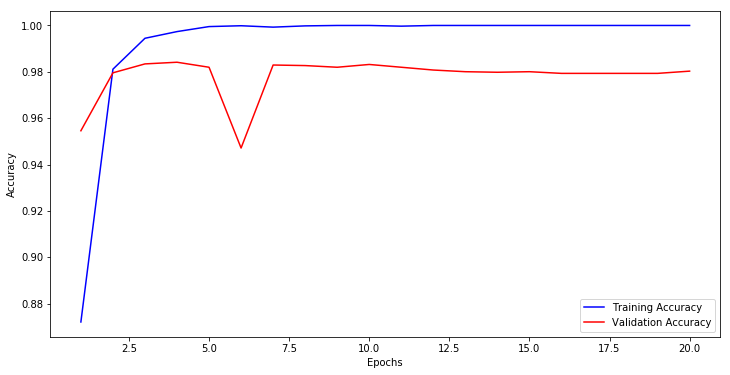

In [23]:
plot_accuracy( history )

#### Train for best Epoch

In [24]:
history_dict = history.history
valid_acc = history_dict['val_acc'] 
best_epoch = valid_acc.index(max(valid_acc)) + 1
best_acc =  max(valid_acc)
print('Best Validation Accuracy Score {}, is for epoch {}'.format( best_acc, best_epoch))

Best Validation Accuracy Score 0.9841346153846153, is for epoch 4


In [25]:
model = get_dnn_model()
history = model.fit( X_train,
                      y_train,
                     epochs = best_epoch,
                     batch_size = 512,
                     validation_data = (X_valid, y_valid)                     
                    )

Train on 16640 samples, validate on 4160 samples
Epoch 1/4
16640/16640 [==============================] - 7s 403us/step - loss: 0.3519 - acc: 0.8838 - val_loss: 0.2089 - val_acc: 0.9476
Epoch 2/4
16640/16640 [==============================] - 6s 379us/step - loss: 0.1150 - acc: 0.9815 - val_loss: 0.0945 - val_acc: 0.9815
Epoch 3/4
16640/16640 [==============================] - 6s 336us/step - loss: 0.0508 - acc: 0.9942 - val_loss: 0.0670 - val_acc: 0.9839
Epoch 4/4
16640/16640 [==============================] - 6s 341us/step - loss: 0.0211 - acc: 0.9989 - val_loss: 0.0627 - val_acc: 0.9846


### Predict on test Set
On Kaggle test set the model achieved accuracy of 98%

In [26]:
y_pred = model.predict_classes(X_test)
test_pred = pd.DataFrame(y_pred, columns= ['label'])
test_pred['id'] = test['id']
test_pred.to_csv('dnn_preds.csv', index = False)

### Save Model

In [27]:
import pickle
model.model.save('fake_news.h5')

with open('tokenizer.pickel', 'wb') as handle:
     pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

#### Predict from a sample with saved model

In [28]:
from keras.models import load_model
model = load_model('fake_news.h5')

tokenizer = Tokenizer()
with open('tokenizer.pickel', 'rb') as handle:
     tokenizer = pickle.load(handle)

In [29]:
sample = pd.read_csv('samples.csv')
sample

,id,title,author,text,label
0,1,Virginia Republican Wants Schools To Check Chi...,Colin Taylor,Republican attacks on transgendered Americans ...,1
1,2,Trump Just Insulted Millions Who Lost Everythi...,"Brett Bose, Grant Stern, Steve Bernstein, Nata...",Hillary Clinton just called out the fact that ...,0
2,3,Another Terrorist Attack in NYC...Why Are we S...,Leonora Cravotta,"On Saturday, September 17 at 8:30 pm EST, an e...",0
3,4,"Trump: Drugs a 'Very, Very Big Factor' in Char...",ABC News,Less than a day after protests over the police...,0


In [30]:
sample['total']= sample['title']+' '+sample['author']+' '+sample['text']
sample_texts = sample.total.tolist()
# sample_texts[:3}

In [31]:
sequences = tokenizer.texts_to_sequences(sample_texts)
sample_data = np.array(sequences)
X_sample = vectorize_sequences(sample_data)
X_sample.shape

(4, 20000)

In [32]:
y_pred = model.predict(X_sample)
y_pred

array([[0.9902291],
       [0.9245203],
       [0.8233578],
       [0.9035453]], dtype=float32)